<a href="https://colab.research.google.com/github/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ipynb file here](https://github.com/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_T2.ipynb)

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
sns.set()
%matplotlib inline
import squarify as sq

from statistics import stdev
from scipy.stats import t

In [ ]:
# import and load the dataset
data = pd.read_csv("/content/drive/MyDrive/Data/Quantium Forage/chips_trans.csv")
data

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,DATE_BINS
0,0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co,October 2018
1,1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs,May 2019
2,2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths,May 2019
3,3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths,August 2018
4,4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle,August 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle,March 2019
264829,264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos,August 2018
264830,264830,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos,November 2018
264831,264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos,December 2018


In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data.drop(['DATE_BINS'], axis=1, inplace=True)

In [ ]:
#data.rename(columns = {'DATE_BINS':'MONTH_BINS'}, inplace = True)

In [ ]:
# using the copy of the dataframe
df1 = data.copy()

In [ ]:
df1.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths


In [ ]:
# convert 'DATE' to datetime
df1['DATE'] =pd.to_datetime(df1['DATE'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264833 entries, 0 to 264832
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   LIFESTAGE         264833 non-null  object        
 9   PREMIUM_CUSTOMER  264833 non-null  object        
 10  PACK_SIZE         264833 non-null  object        
 11  BRAND_NAME        264833 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.2+ MB


In [ ]:
df1.shape

(264833, 12)

In [ ]:
# check null values in df1
display(df1.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PACK_SIZE           0
BRAND_NAME          0
dtype: int64

**SELECT CONTROL STORES**

* Trial Stores - 77, 86, 88
* Control stores - stores in operation from July 2018 - June 2019
* Matching trial stores to control stores similar to the trial store prior to
  Feb 2019
* Pre trial period -> July 2018 till Jan 2019

In [ ]:
# add a YEARMONTH column
df1["YEARMONTH"] = [pd.to_numeric("".join(str(ym).split('-')[0:2])) for ym in df1['DATE']]
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,YEARMONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co,201810
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs,201905
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths,201905
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths,201808
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle,201808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle,201903
264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos,201808
264830,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos,201811
264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos,201812


For each month and each store, we calculate:
1. Total sales
2. Number of customers
3. Transaction per customer
4. Chips per transaction
5. Average price per unit

In [ ]:
# Monthly total sales
total_sales = df1.groupby(['STORE_NBR', 'YEARMONTH'])["TOT_SALES"].sum().reset_index()
total_sales

,STORE_NBR,YEARMONTH,TOT_SALES
0,1,201807,206.9
1,1,201808,176.1
2,1,201809,278.8
3,1,201810,188.1
4,1,201811,192.6
...,...,...,...
3164,272,201902,395.5
3165,272,201903,442.3
3166,272,201904,445.1
3167,272,201905,314.6


In [ ]:
# monthly number of customers
no_of_customers = df1.groupby(['STORE_NBR', 'YEARMONTH'])["LYLTY_CARD_NBR"].nunique().reset_index().rename(columns = {"LYLTY_CARD_NBR": "NBR_OF_CUSTOMERS"})
no_of_customers

,STORE_NBR,YEARMONTH,NBR_OF_CUSTOMERS
0,1,201807,49
1,1,201808,42
2,1,201809,59
3,1,201810,44
4,1,201811,46
...,...,...,...
3164,272,201902,45
3165,272,201903,50
3166,272,201904,54
3167,272,201905,34


In [ ]:
# Monthly store transaction per customer
# This is gotten by dividing unique number of TXN_ID by unique LYLTY_CARD_NBR

trans_per_cust = (df1.groupby(['STORE_NBR', 'YEARMONTH'])['TXN_ID'].nunique() / df1.groupby(['STORE_NBR', 'YEARMONTH'])['LYLTY_CARD_NBR'].nunique()).reset_index()
trans_per_cust = trans_per_cust.rename(columns ={0: 'TXN_PER_CUSTOMER'})
trans_per_cust

,STORE_NBR,YEARMONTH,TXN_PER_CUSTOMER
0,1,201807,1.061224
1,1,201808,1.023810
2,1,201809,1.050847
3,1,201810,1.022727
4,1,201811,1.021739
...,...,...,...
3164,272,201902,1.066667
3165,272,201903,1.060000
3166,272,201904,1.018519
3167,272,201905,1.176471


In [ ]:
# Monthly store number of chips per transaction
# This is gotten by dividing sum of product quantity by number of unique transaction

chips_per_txn = (df1.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum() / df1.groupby(['STORE_NBR', 'YEARMONTH'])['TXN_ID'].nunique()).reset_index()
chips_per_txn = chips_per_txn.rename(columns ={0: 'CHIPS_PER_TXN'})
chips_per_txn

,STORE_NBR,YEARMONTH,CHIPS_PER_TXN
0,1,201807,1.192308
1,1,201808,1.255814
2,1,201809,1.209677
3,1,201810,1.288889
4,1,201811,1.212766
...,...,...,...
3164,272,201902,1.895833
3165,272,201903,1.905660
3166,272,201904,1.909091
3167,272,201905,1.775000


In [ ]:
# Monthly store average price per unit
# This is gotten by using the sum of total sales divided by the sum of product quantity

avg_price_per_unit = (df1.groupby(['STORE_NBR', 'YEARMONTH'])['TOT_SALES'].sum() / df1.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum()).reset_index()
avg_price_per_unit = avg_price_per_unit.rename(columns ={0: 'AVG_PRICE_PER_UNIT'})
avg_price_per_unit

,STORE_NBR,YEARMONTH,AVG_PRICE_PER_UNIT
0,1,201807,3.337097
1,1,201808,3.261111
2,1,201809,3.717333
3,1,201810,3.243103
4,1,201811,3.378947
...,...,...,...
3164,272,201902,4.346154
3165,272,201903,4.379208
3166,272,201904,4.239048
3167,272,201905,4.430986


In [ ]:
# Concatenate the dataframes we got above to get the -Measure over time DF-
df_ = [total_sales, no_of_customers['NBR_OF_CUSTOMERS'], trans_per_cust["TXN_PER_CUSTOMER"], chips_per_txn['CHIPS_PER_TXN'], avg_price_per_unit['AVG_PRICE_PER_UNIT']]
df_measureOverTime = pd.concat(df_, join = 'outer', axis = 1)
df_measureOverTime

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [ ]:
# now, we check stores that have no sale(no full observation) during our total observation period
no_sale = pd.pivot_table(df1, index = 'STORE_NBR', columns = 'YEARMONTH', values = 'TXN_ID', aggfunc = 'count')
no_sale

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [ ]:
# stores with incomplete observation
no_sale.isnull().sum()

YEARMONTH
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

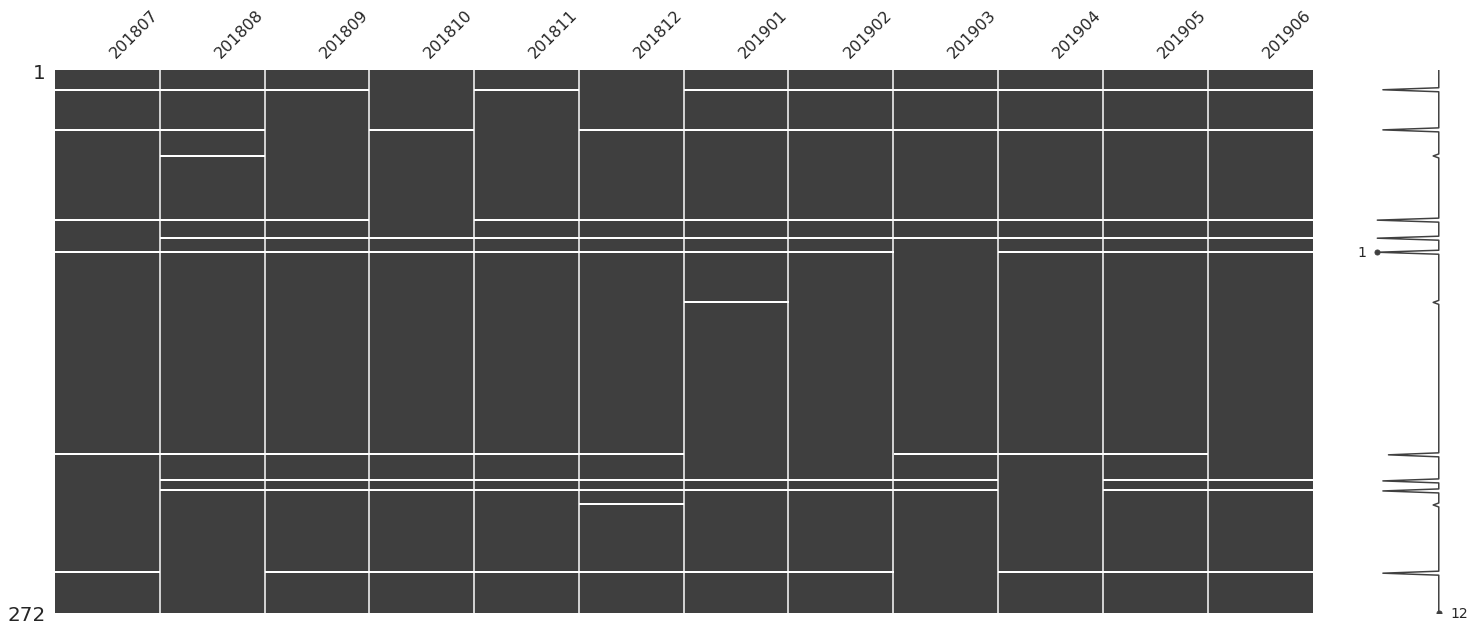

In [ ]:
# still checking for incomplete obs
mn.matrix(no_sale)

In [ ]:
no_sale_store = no_sale[no_sale.isnull().any(axis=1)].index.to_list()
display(no_sale_store)
print()
length = len(no_sale_store)
print(f"We thus have {length} stores with imcomplete observations")

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]


We thus have 12 stores with imcomplete observations


In [ ]:
# now we remove those stores from our df_measureOverTime dataframe
len(df_measureOverTime)

3169

In [ ]:
#dropping the null/no_sale_stores
# df_measureOverTime becomes a DataFrame that contains data whose store number is not in the no_sale_store list
df_measureOverTime = df_measureOverTime[~df_measureOverTime['STORE_NBR'].isin(no_sale_store)]
display(len(df_measureOverTime))

3120

In [ ]:
df_measureOverTime.shape

(3120, 7)

In [ ]:
# Ctreating a new DataFrame - df_pretrial_m - to contain the period before the trial
# filter df_measureOverTime to get period before 'YEARMONTH' 201902
df_pretrial_m = df_measureOverTime[df_measureOverTime['YEARMONTH'] < 201902]
len(df_pretrial_m)

1820

In [ ]:
# calculating correlation between trial store and other stores

def correlationCalc(table, the_metric, trial_store):
    result = pd.DataFrame({'store1': [], 'store2': [], 'correlation': []})
    filter1 = table.loc[table['STORE_NBR'] == trial_store, the_metric]
    filter1.reset_index(drop = True, inplace = True)
    storeNumbers = table['STORE_NBR'].unique()
    for a in storeNumbers:
        filter2 = table.loc[table['STORE_NBR'] == a, the_metric]
        filter2.reset_index(drop = True, inplace = True)
        result = result.append({'store1': trial_store, 'store2': a, 'correlation': filter2.corr(filter1)}, ignore_index = True)
    return result

In [ ]:
#calculate magnitude distance

def magnitudeDistanceCalc(table, the_metric, trial_store):
    result = pd.DataFrame({'store1': [], 'store2': [], 'magnitude' : []})
    filter1 = table.loc[table['STORE_NBR'] == trial_store, the_metric]
    filter1.reset_index(drop = True, inplace = True)
    storeNumbers = table['STORE_NBR'].unique()
    for z in storeNumbers:
        filter2 = table.loc[table['STORE_NBR'] == z, the_metric]
        filter2.reset_index(drop = True, inplace = True)
        abs_calc = abs(filter1-filter2)
        mean_calc = np.mean(1-(abs_calc-min(abs_calc))/(max(abs_calc)-min(abs_calc)))
        result = result.append({'store1': trial_store, 'store2': z, 'magnitude': mean_calc}, ignore_index = True)
    return result

Selecting control store for trial 77

In [ ]:
# Now we select control store for trial 77 by computing correlation with store 77
the_trial_store = 77
corr_sales_77 = correlationCalc(df_pretrial_m, 'TOT_SALES', the_trial_store)
corr_customers_77 = correlationCalc(df_pretrial_m, 'NBR_OF_CUSTOMERS', the_trial_store)

# calculate magnitude with trial store 77
magn_sales_77 = magnitudeDistanceCalc(df_pretrial_m, 'TOT_SALES', the_trial_store)
magn_customers_77 = magnitudeDistanceCalc(df_pretrial_m, 'NBR_OF_CUSTOMERS', the_trial_store)

In [ ]:
#Checking the  for correlation
print('Total Sales Correlation')
display(corr_sales_77.head())
print()
print()
print('Number of Customers Correlation')
corr_customers_77.head()

Total Sales Correlation


,store1,store2,correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652




Number of Customers Correlation


,store1,store2,correlation
0,77.0,1.0,0.322168
1,77.0,2.0,-0.572051
2,77.0,3.0,0.834207
3,77.0,4.0,-0.295639
4,77.0,5.0,0.370659


In [ ]:
#Checking the results for magnitude
print('Total Sales Magnitude')
display(magn_sales_77.head())
print()
print()
print('Number of Customers Magnitude')
magn_customers_77.head()

Total Sales Magnitude


,store1,store2,magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320




Number of Customers Magnitude


,store1,store2,magnitude
0,77.0,1.0,0.663866
1,77.0,2.0,0.471429
2,77.0,3.0,0.489796
3,77.0,4.0,0.498258
4,77.0,5.0,0.512605


In [ ]:
#Now we concatenate correlation and magnitude (Sales, store 77 as we recall)
corr_magn_sales = pd.concat([corr_sales_77, magn_sales_77['magnitude']], axis = 1)
corr_magn_sales

,store1,store2,correlation,magnitude
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320
...,...,...,...,...
255,77.0,268.0,0.344757,0.429787
256,77.0,269.0,-0.315730,0.559099
257,77.0,270.0,0.315430,0.591547
258,77.0,271.0,0.355487,0.341091


In [ ]:
# adding a column to store the calculation of the weighted average
corr_weight = 0.5
corr_magn_sales['weighted_average_sales'] = corr_weight * corr_magn_sales['correlation'] + (1 - corr_weight) * corr_magn_sales['magnitude']
corr_magn_sales.head()

,store1,store2,correlation,magnitude,weighted_average_sales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [ ]:
#Now we concatenate correlation and magnitude (Customers, store 77 as we recall)
corr_magn_customers = pd.concat([corr_customers_77, magn_customers_77['magnitude']], axis = 1)
corr_magn_customers

,store1,store2,correlation,magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605
...,...,...,...,...
255,77.0,268.0,0.369517,0.571429
256,77.0,269.0,-0.474293,0.484472
257,77.0,270.0,-0.131259,0.536680
258,77.0,271.0,0.019629,0.328571


In [ ]:
# adding a column to store the calculation of the weighted average
corr_magn_customers['weighted_average_customers'] = corr_weight * corr_magn_customers['correlation'] + (1 - corr_weight) * corr_magn_customers['magnitude']
corr_magn_customers.head()

,store1,store2,correlation,magnitude,weighted_average_customers
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [ ]:
corr_magn_sales.set_index(['store1', 'store2'], inplace=True)
corr_magn_customers.set_index(['store1', 'store2'], inplace=True)

In [ ]:
#create a new DF that stores the weighted averages of both corr_magn_sales and corr_magn_customers
weighted_averages_77 = pd.concat([corr_magn_sales['weighted_average_sales'], corr_magn_customers['weighted_average_customers']], axis=1)
weighted_averages_77

weighted_average_sales  weighted_average_customers
store1 store2                                                    
77.0   1.0                   0.241691                    0.493017
       2.0                   0.163520                   -0.050311
       3.0                   0.664779                    0.662002
       4.0                   0.190817                    0.101310
       5.0                   0.202834                    0.441632
...                               ...                         ...
       268.0                 0.387272                    0.470473
       269.0                 0.121684                    0.005090
       270.0                 0.453489                    0.202710
       271.0                 0.348289                    0.174100
       272.0                 0.320626                    0.384336

[260 rows x 2 columns]

In [ ]:
# adding a column [final_weighted_avg] to the DF(weighted_averages_77) to compute the averages of both weighted avg
weighted_averages_77['final_weighted_avg'] = (weighted_averages_77['weighted_average_sales'] + weighted_averages_77['weighted_average_customers']) / 2
weighted_averages_77.head()

weighted_average_sales  weighted_average_customers  \
store1 store2                                                       
77.0   1.0                   0.241691                    0.493017   
       2.0                   0.163520                   -0.050311   
       3.0                   0.664779                    0.662002   
       4.0                   0.190817                    0.101310   
       5.0                   0.202834                    0.441632   

               final_weighted_avg  
store1 store2                      
77.0   1.0               0.367354  
       2.0               0.056604  
       3.0               0.663390  
       4.0               0.146064  
       5.0               0.322233

In [ ]:
# check stores with the highest final_weighted_avg
weighted_averages_77.sort_values(by = 'final_weighted_avg', ascending=False).head()

weighted_average_sales  weighted_average_customers  \
store1 store2                                                       
77.0   233.0                 0.697290                    0.816607   
       71.0                  0.789497                    0.663123   
       84.0                  0.656972                    0.715000   
       119.0                 0.636046                    0.729729   
       115.0                 0.708347                    0.645155   

               final_weighted_avg  
store1 store2                      
77.0   233.0             0.756949  
       71.0              0.726310  
       84.0              0.685986  
       119.0             0.682887  
       115.0             0.676751

In [ ]:
# for trial store 77
control_store = 233

From above, Store 233 matches trial store 77 with final_weighted_avg of 0.756949

In [ ]:
# Let's plot some graphs
# create a new dataframe to use in our plotting

previous_sales = df_pretrial_m.copy()
type_of_store = []

for each in previous_sales['STORE_NBR']:
  if each == the_trial_store:
    type_of_store.append('Trial Store')
  elif each == control_store:
    type_of_store.append('Control Store')
  else:
    type_of_store.append('Other Stores')

previous_sales['store_type'] = type_of_store
previous_sales.head()

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores


In [ ]:
previous_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STORE_NBR           1820 non-null   int64  
 1   YEARMONTH           1820 non-null   int64  
 2   TOT_SALES           1820 non-null   float64
 3   NBR_OF_CUSTOMERS    1820 non-null   int64  
 4   TXN_PER_CUSTOMER    1820 non-null   float64
 5   CHIPS_PER_TXN       1820 non-null   float64
 6   AVG_PRICE_PER_UNIT  1820 non-null   float64
 7   store_type          1820 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 128.0+ KB


In [ ]:
# we need YEARMONTH in datetime format
previous_sales['transaction_month'] = pd.to_datetime(previous_sales['YEARMONTH'].astype(str), format = '%Y%m')
previous_sales

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,store_type,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549,Other Stores,2018-09-01
3160,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores,2018-10-01
3161,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores,2018-11-01
3162,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores,2018-12-01


In [ ]:
previous_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   STORE_NBR           1820 non-null   int64         
 1   YEARMONTH           1820 non-null   int64         
 2   TOT_SALES           1820 non-null   float64       
 3   NBR_OF_CUSTOMERS    1820 non-null   int64         
 4   TXN_PER_CUSTOMER    1820 non-null   float64       
 5   CHIPS_PER_TXN       1820 non-null   float64       
 6   AVG_PRICE_PER_UNIT  1820 non-null   float64       
 7   store_type          1820 non-null   object        
 8   transaction_month   1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


In [ ]:
# quick column rename
previous_sales.rename(columns = {'store_type':'STORE_TYPE', 'transaction_month':'TRANSACTION_MONTH'}, inplace = True)

In [ ]:
# now we prepare new dataframes needed for our viz - monthly sales comparison between trial store 77 and control store 233
#Monthly Sales
control_store_sales = previous_sales.loc[previous_sales['STORE_TYPE'] == 'Control Store', ['TRANSACTION_MONTH', 'TOT_SALES']]
control_store_sales.set_index('TRANSACTION_MONTH', inplace=True)
control_store_sales.rename(columns = {'TOT_SALES':'Control_Store'}, inplace=True)
display(control_store_sales)
print()

other_stores_sales = previous_sales.loc[previous_sales['STORE_TYPE'] == 'Other Stores', ['TRANSACTION_MONTH', 'TOT_SALES']]
# we groupby here because 'other_stores' contain more than one store - using the mean tot_sales per month
other_stores_sales = pd.DataFrame(other_stores_sales.groupby('TRANSACTION_MONTH')['TOT_SALES'].mean())
other_stores_sales.rename(columns = {'TOT_SALES':'Other_Stores'}, inplace=True)
display(other_stores_sales)
print()

trial_store_sales = previous_sales.loc[previous_sales['STORE_TYPE'] == 'Trial Store', ['TRANSACTION_MONTH', 'TOT_SALES']]
trial_store_sales.set_index('TRANSACTION_MONTH', inplace=True)
trial_store_sales.rename(columns = {'TOT_SALES':'Trial_Store'}, inplace=True)
display(trial_store_sales)
print()

,Control_Store
TRANSACTION_MONTH,
2018-07-01,290.7
2018-08-01,285.9
2018-09-01,228.6
2018-10-01,185.7
2018-11-01,211.6
2018-12-01,279.8
2019-01-01,177.5


,Other_Stores
TRANSACTION_MONTH,
2018-07-01,638.004651
2018-08-01,610.223450
2018-09-01,620.198450
2018-10-01,635.291473
2018-11-01,618.864341
2018-12-01,648.453876
2019-01-01,628.684496


,Trial_Store
TRANSACTION_MONTH,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4


In [ ]:
# we need the 3 dataframes as 1 dataframe so we concatenate
store_type_sales = pd.concat([control_store_sales, trial_store_sales, other_stores_sales],axis = 1)
display(store_type_sales)

,Control_Store,Trial_Store,Other_Stores
TRANSACTION_MONTH,,,
2018-07-01,290.7,296.8,638.004651
2018-08-01,285.9,255.5,610.223450
2018-09-01,228.6,225.2,620.198450
2018-10-01,185.7,204.5,635.291473
2018-11-01,211.6,245.3,618.864341
2018-12-01,279.8,267.3,648.453876
2019-01-01,177.5,204.4,628.684496


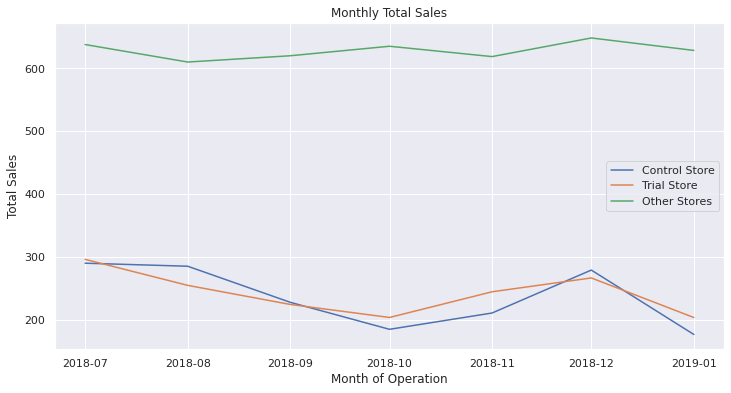

In [ ]:
#plot
stores_t = ['Control Store', 'Trial Store', 'Other Stores']
plt.figure(figsize = (12, 6))
plt.plot(store_type_sales)
plt.title('Monthly Total Sales')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(stores_t, loc=5)
plt.show()

In [ ]:
# now we prepare new dataframes needed for our viz - monthly number of customers comparison between trial store 77 and control store 233
#number of customers
control_store_customers = previous_sales.loc[previous_sales['STORE_TYPE'] == 'Control Store', ['TRANSACTION_MONTH', 'NBR_OF_CUSTOMERS']]
control_store_customers.set_index('TRANSACTION_MONTH', inplace=True)
control_store_customers.rename(columns = {'NBR_OF_CUSTOMERS':'Control_Store'}, inplace=True)
display(control_store_customers)
print()

other_stores_customers = previous_sales.loc[previous_sales['STORE_TYPE'] == 'Other Stores', ['TRANSACTION_MONTH', 'NBR_OF_CUSTOMERS']]
# we groupby here because 'other_stores' contain more than one store - using the mean tot_sales per month
other_stores_customers = pd.DataFrame(other_stores_customers.groupby('TRANSACTION_MONTH')['NBR_OF_CUSTOMERS'].mean())
other_stores_customers.rename(columns = {'NBR_OF_CUSTOMERS':'Other_Stores'}, inplace=True)
display(other_stores_customers)
print()

trial_store_customers = previous_sales.loc[previous_sales['STORE_TYPE'] == 'Trial Store', ['TRANSACTION_MONTH', 'NBR_OF_CUSTOMERS']]
trial_store_customers.set_index('TRANSACTION_MONTH', inplace=True)
trial_store_customers.rename(columns = {'NBR_OF_CUSTOMERS':'Trial_Store'}, inplace=True)
display(trial_store_customers)
print()

,Control_Store
TRANSACTION_MONTH,
2018-07-01,51
2018-08-01,48
2018-09-01,42
2018-10-01,35
2018-11-01,40
2018-12-01,47
2019-01-01,35


,Other_Stores
TRANSACTION_MONTH,
2018-07-01,72.333333
2018-08-01,72.120155
2018-09-01,70.131783
2018-10-01,71.608527
2018-11-01,70.534884
2018-12-01,73.515504
2019-01-01,71.240310


,Trial_Store
TRANSACTION_MONTH,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35


In [ ]:
# concatenate again as we did for sales
store_type_customers = pd.concat([control_store_customers, trial_store_customers, other_stores_customers],axis = 1)
display(store_type_customers)

,Control_Store,Trial_Store,Other_Stores
TRANSACTION_MONTH,,,
2018-07-01,51,51,72.333333
2018-08-01,48,47,72.120155
2018-09-01,42,42,70.131783
2018-10-01,35,37,71.608527
2018-11-01,40,41,70.534884
2018-12-01,47,46,73.515504
2019-01-01,35,35,71.240310


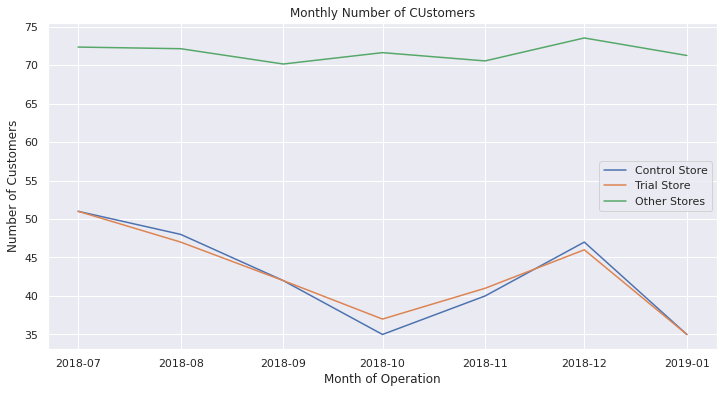

In [ ]:
#plot
stores_t = ['Control Store', 'Trial Store', 'Other Stores']
plt.figure(figsize = (12, 6))
plt.plot(store_type_customers)
plt.title('Monthly Number of CUstomers')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(stores_t, loc=5)
plt.show()

With both charts above, we are likely correct to have store 233 as the Control Store for trial Store 7

### Now we assess Trial for Trial store 77
##### Trial period was from Feb 2019 up until April 2019
Now we want to see if what was done in the trial period has contributed to high number of sales, customer increase and ...


In [ ]:
# saving our first pretrial df incase we need it later
first_df_pretrial_m = df_pretrial_m.copy()

# now we have our pretrial df and now same as previous_sales DF
df_pretrial_m = previous_sales.copy()
df_pretrial_m.head()

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,STORE_TYPE,TRANSACTION_MONTH
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [ ]:
# we figure out the scaling factor by sum(total sales) for trial store / sum(total sales) for control store
# so we create scaling factor for sales
sum_control_store = df_pretrial_m[df_pretrial_m['STORE_TYPE'] == 'Control Store']['TOT_SALES'].sum()
sum_trial_store = df_pretrial_m[df_pretrial_m['STORE_TYPE'] == 'Trial Store']['TOT_SALES'].sum()
sales_scaling_factor = sum_trial_store/sum_control_store
sales_scaling_factor

1.023617303289553

In [ ]:
# create a new DF 'scaled_control_sales'
# we use our df_measureOverTime DF in the process

scaled_control_sales = df_measureOverTime.copy()

# we want only the control stores - store 233
scaled_control_sales = scaled_control_sales[scaled_control_sales['STORE_NBR'] == control_store]
scaled_control_sales.head()

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT
2699,233,201807,290.7,51,1.058824,1.629630,3.303409
2700,233,201808,285.9,48,1.041667,1.600000,3.573750
2701,233,201809,228.6,42,1.071429,1.555556,3.265714
2702,233,201810,185.7,35,1.028571,1.555556,3.316071
2703,233,201811,211.6,40,1.025000,1.512195,3.412903


In [ ]:
# create a controlSales col which does TOT_SALES*sales_scaling_factor

scaled_control_sales['CONTROL_SALES'] = scaled_control_sales['TOT_SALES'] * sales_scaling_factor
scaled_control_sales

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,CONTROL_SALES
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,286.408121
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,249.762622
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,203.802205
2708,233,201904,158.6,30,1.066667,1.437500,3.447826,162.345704


In [ ]:
# create % diff

percent_diff = scaled_control_sales[['YEARMONTH', 'CONTROL_SALES']]
percent_diff.reset_index(drop=True, inplace=True)
percent_diff

,YEARMONTH,CONTROL_SALES
0,201807,297.565550
1,201808,292.652187
2,201809,233.998916
3,201810,190.085733
4,201811,216.597421
5,201812,286.408121
6,201901,181.692071
7,201902,249.762622
8,201903,203.802205
9,201904,162.345704


In [ ]:
# concatenate %diff with trial store tot_sale
trial_sales = df_measureOverTime.loc[df_measureOverTime['STORE_NBR'] == the_trial_store, 'TOT_SALES']
trial_sales.reset_index(drop = True, inplace = True)

percent_diff = pd.concat([percent_diff, trial_sales], axis = 1)
percent_diff.rename(columns = {'TOT_SALES': 'TRIAL_SALES'}, inplace = True)
percent_diff

,YEARMONTH,CONTROL_SALES,TRIAL_SALES
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [ ]:
percent_diff['PERCENTAGE_DIFFERENCE'] = abs(percent_diff['CONTROL_SALES'] - percent_diff['TRIAL_SALES']) / percent_diff['CONTROL_SALES']
percent_diff

,YEARMONTH,CONTROL_SALES,TRIAL_SALES,PERCENTAGE_DIFFERENCE
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


In [ ]:
# Trial period is same as the pre-trial period - Null Hypothesis
# We take the std based on the scaled percentage difference in the pre-trial period

std_dev = stdev(percent_diff.loc[percent_diff['YEARMONTH'] < 201902, 'PERCENTAGE_DIFFERENCE'])
std_dev

0.04994076264142537

In [ ]:
# we define the degrees of freedom
# dof  = pretrial month - 1
dof = 8 - 1
dof

7

In [ ]:
# now we test with a null hypothesis if there is 0 difference between trial and control store
percent_diff['T_VALUE'] = (percent_diff['PERCENTAGE_DIFFERENCE'] - 0)/std_dev
percent_diff.loc[(percent_diff['YEARMONTH'] > 201901) & (percent_diff['YEARMONTH'] < 201905)]['T_VALUE']

7     1.183534
8     7.339116
9    12.476373
Name: T_VALUE, dtype: float64

In [ ]:
# find the 95th percentile of the t distribution with our degrees of freedom
t.isf(0.05, dof)

1.8945786050613054

It is observable that March and Aprils t-value is larger that the 95th percentile value of the t-distribution

In [ ]:
scaled_control_sales.head()

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,CONTROL_SALES
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421


In [ ]:
# add a new col 'TRANSACTION_MONTH'
scaled_control_sales['TRANSACTION_MONTH'] = pd.to_datetime(scaled_control_sales['YEARMONTH'].astype(str), format= '%Y%m')

In [ ]:
scaled_control_sales

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,CONTROL_SALES,TRANSACTION_MONTH
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550,2018-07-01
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187,2018-08-01
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916,2018-09-01
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733,2018-10-01
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421,2018-11-01
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,286.408121,2018-12-01
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071,2019-01-01
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,249.762622,2019-02-01
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,203.802205,2019-03-01
2708,233,201904,158.6,30,1.066667,1.437500,3.447826,162.345704,2019-04-01


In [ ]:
# Before we visualize, we coin out a DF to use to visualize control sales
the_controlsales = scaled_control_sales[['TRANSACTION_MONTH', 'CONTROL_SALES']]
the_controlsales.set_index('TRANSACTION_MONTH', inplace=True)
the_controlsales

,CONTROL_SALES
TRANSACTION_MONTH,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [ ]:
# Create a transactionmonth col under the measureovertime DF

df_measureOverTime['TransactionMonth'] = pd.to_datetime(df_measureOverTime['YEARMONTH'].astype(str), format = '%Y%m')
df_measureOverTime.head()

In [ ]:
df_measureOverTime.rename(columns = {'TransactionMonth': 'TRANSACTION_MONTH'}, inplace = True)
df_measureOverTime

In [81]:
# Extract 'totSales' for trial store from 'measureOverTime'

the_trialsales = df_measureOverTime.loc[df_measureOverTime['STORE_NBR'] == the_trial_store, ['TRANSACTION_MONTH', 'TOT_SALES']]
the_trialsales.set_index('TRANSACTION_MONTH', inplace = True)
the_trialsales.rename(columns = {'TOT_SALES': 'TRIAL_SALES'}, inplace = True)
the_trialsales

,TRIAL_SALES
TRANSACTION_MONTH,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [ ]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
# calculate the 5% and 95% confidence interval and add their columns

the_controlsales['Control Confidence Interval 5%'] = the_controlsales['CONTROL_SALES'] * (1 - std_dev*2)
the_controlsales['Control Confidence Interval 95%'] = the_controlsales['CONTROL_SALES'] * (1 + std_dev*2)
the_controlsales

In [82]:
# merge control sales and trial sales
sales_merged = pd.merge(the_controlsales, the_trialsales, left_index = True, right_index = True)
sales_merged

,CONTROL_SALES,Control Confidence Interval 5%,Control Confidence Interval 95%,TRIAL_SALES
TRANSACTION_MONTH,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


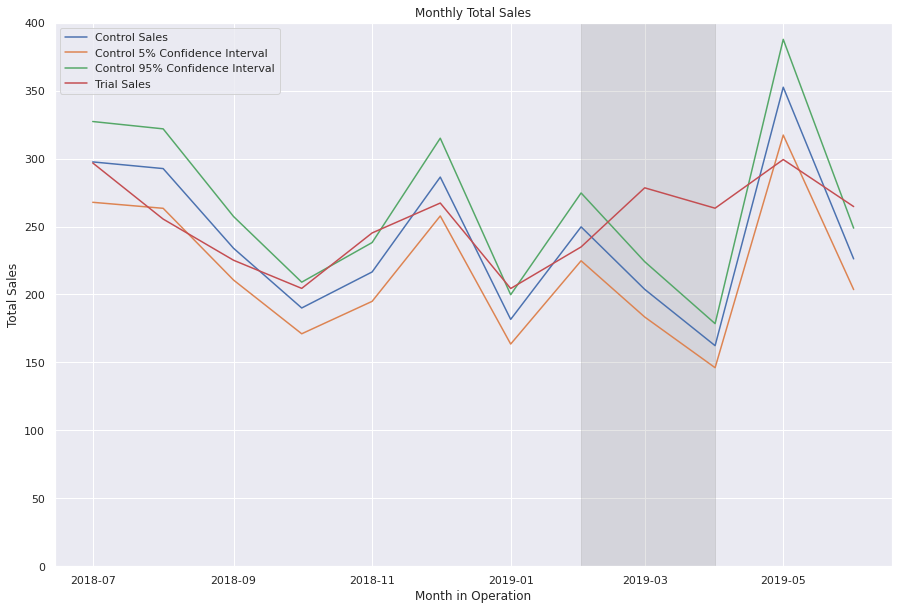

In [90]:
# lets plot

# Make it bigger
plt.figure(figsize = (15, 10))
plt.plot(sales_merged)

# Set graph title and axis title
plt.title('Monthly Total Sales')
plt.xlabel('Month in Operation')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Sales'], loc = 2)

# Set new y-axis limit
plt.ylim((0, 400))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.show()

From the results and chart, we observe that the trial in store 77 is significantly different to its control store in the trial period. The trial store performance lies outside the 5 and 95 percent confidence interval for the month of March and April 2019.

In [ ]:
# Now we do the same for numbe of customers